# Plotting distributions (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to plot a distribution of data.

## Solution
This sample data will be used for the examples below:

In [1]:
set.seed(1234)
dat <- data.frame(cond = factor(rep(c("A","B"), each=200)), 
                   rating = c(rnorm(200),rnorm(200, mean=.8)))
# View first few rows
head(dat)

,cond,rating
1,A,-1.207066
2,A,0.2774292
3,A,1.084441
4,A,-2.345698
5,A,0.4291247
6,A,0.5060559


In [2]:
# use the ggplot2 library in this notebook
library(ggplot2)

### Histogram and density plots

The `qplot` function is supposed make the same graphs as `ggplot`, but with a simpler syntax. However, in practice, it’s often easier to just use `ggplot` because the options for `qplot` can be more confusing to use.

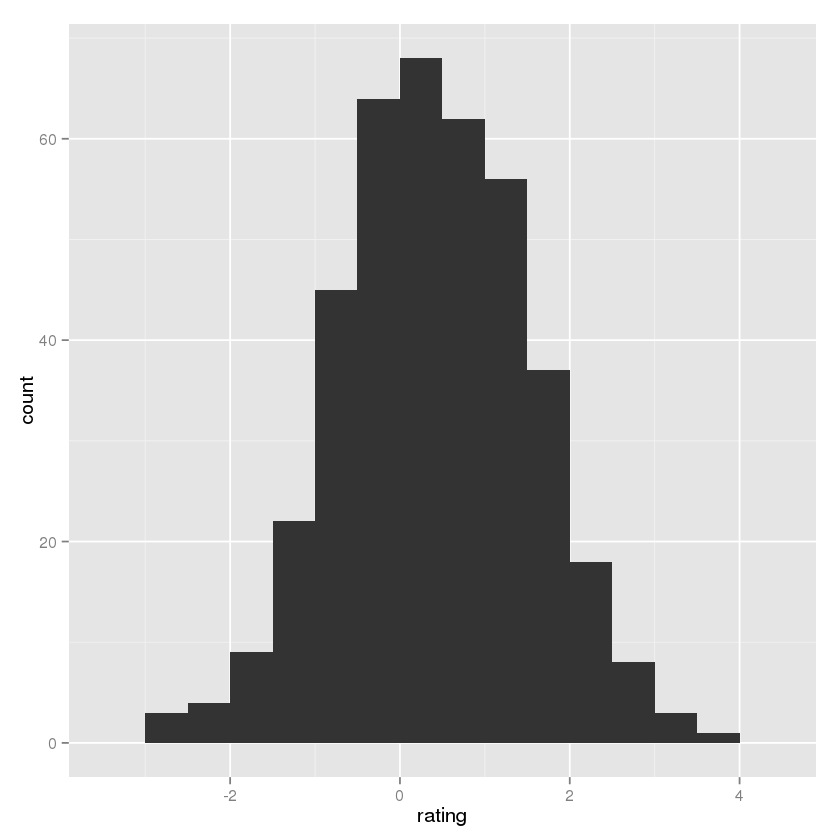

In [3]:
## Basic histogram from the vector "rating". Each bin is .5 wide.
## These both result in the same output:
ggplot(dat, aes(x=rating)) + geom_histogram(binwidth=.5)

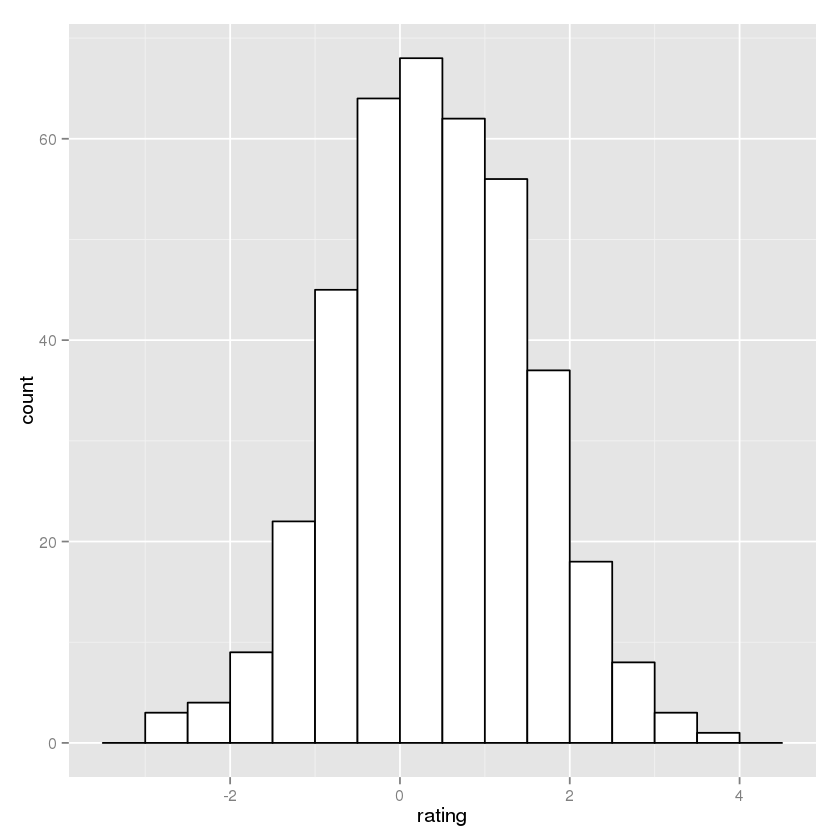

In [4]:
# Draw with black outline, white fill
ggplot(dat, aes(x=rating)) +
    geom_histogram(binwidth=.5, colour="black", fill="white")


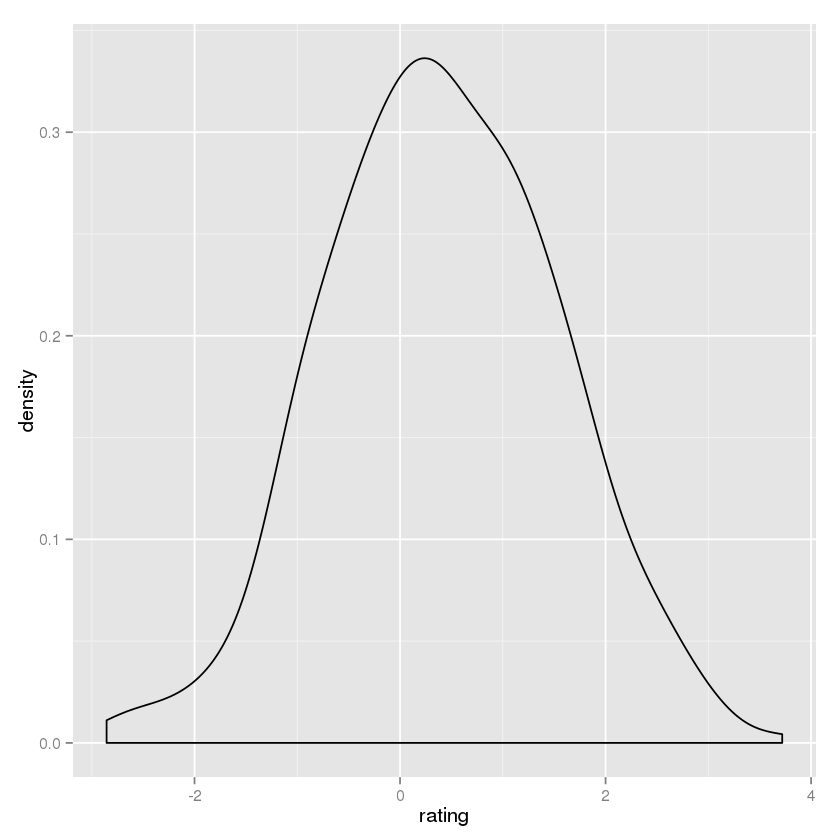

In [5]:
# Density curve
ggplot(dat, aes(x=rating)) + geom_density()

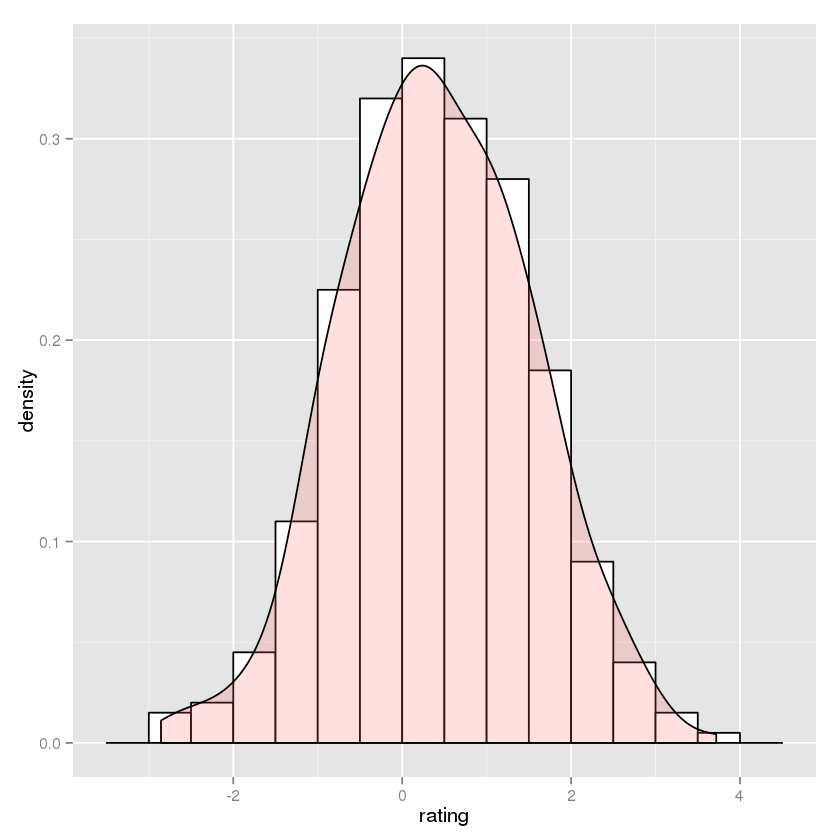

In [6]:
# Histogram overlaid with kernel density curve
ggplot(dat, aes(x=rating)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=.5,
                   colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")  # Overlay with transparent density plot

Add a line for the mean:

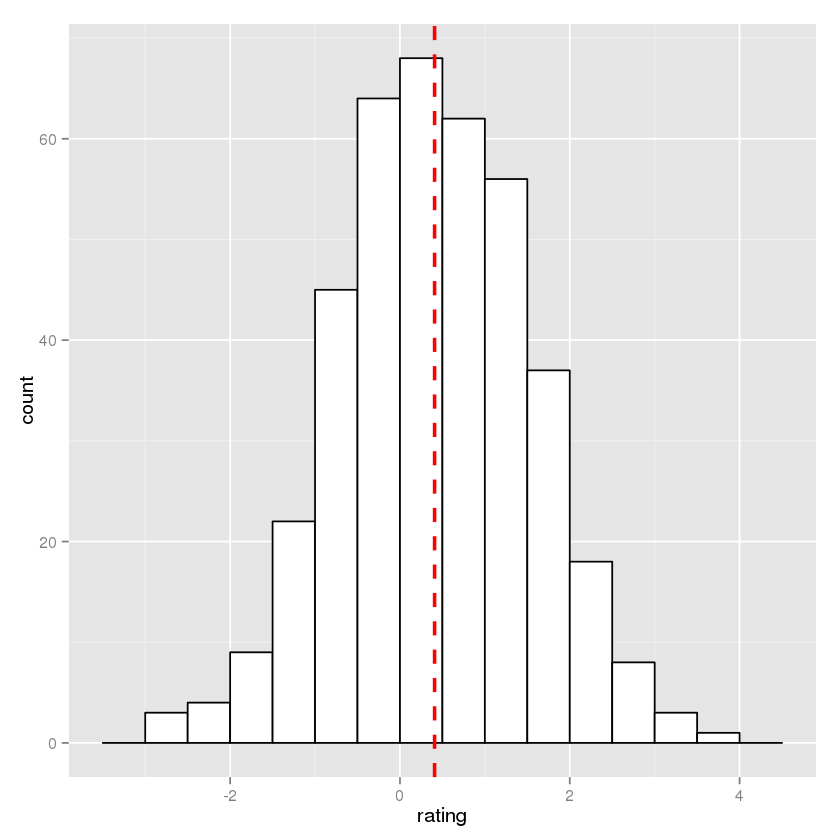

In [7]:
ggplot(dat, aes(x=rating)) +
    geom_histogram(binwidth=.5, colour="black", fill="white") +
    geom_vline(aes(xintercept=mean(rating, na.rm=T)),   # Ignore NA values for mean
               color="red", linetype="dashed", size=1)

### Histogram and density plots with multiple groups

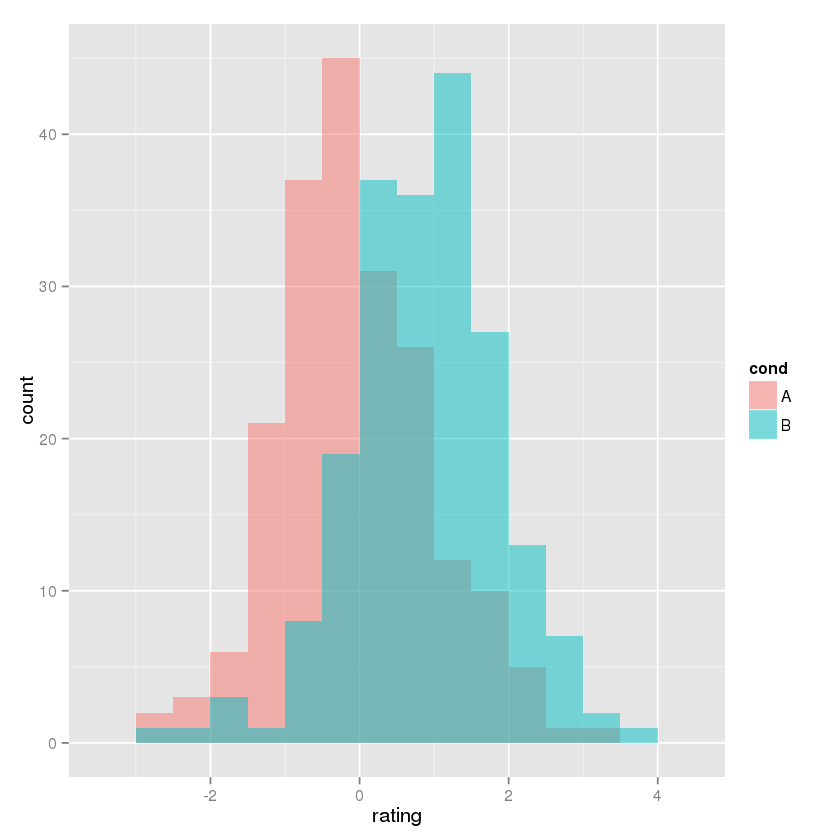

In [8]:
# Overlaid histograms
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity")

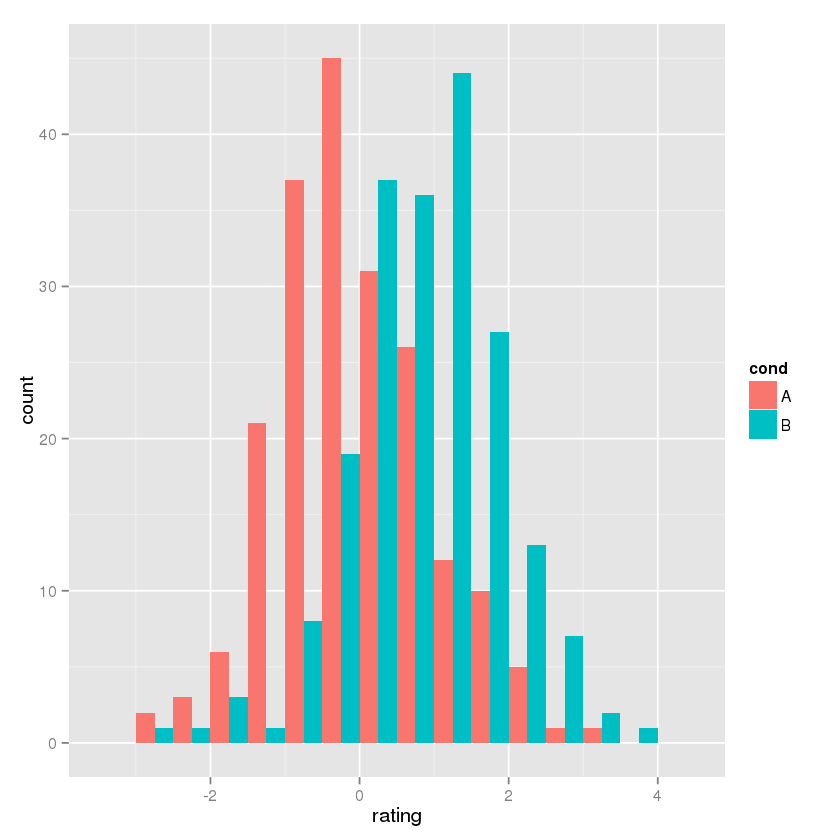

In [9]:
# Interleaved histograms
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, position="dodge")

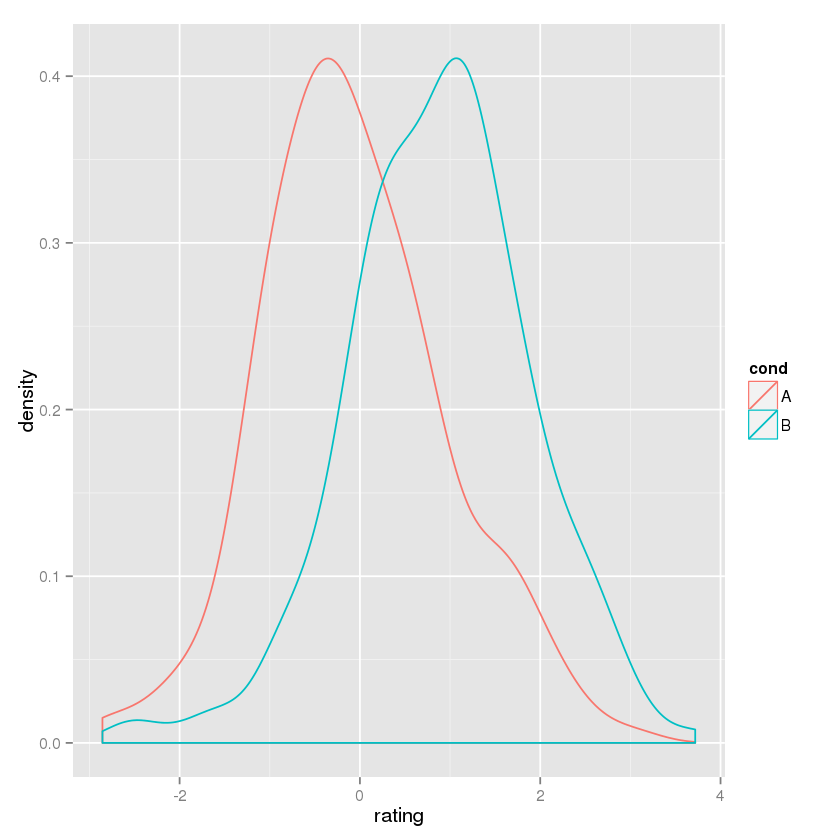

In [10]:
# Density plots
ggplot(dat, aes(x=rating, colour=cond)) + geom_density()

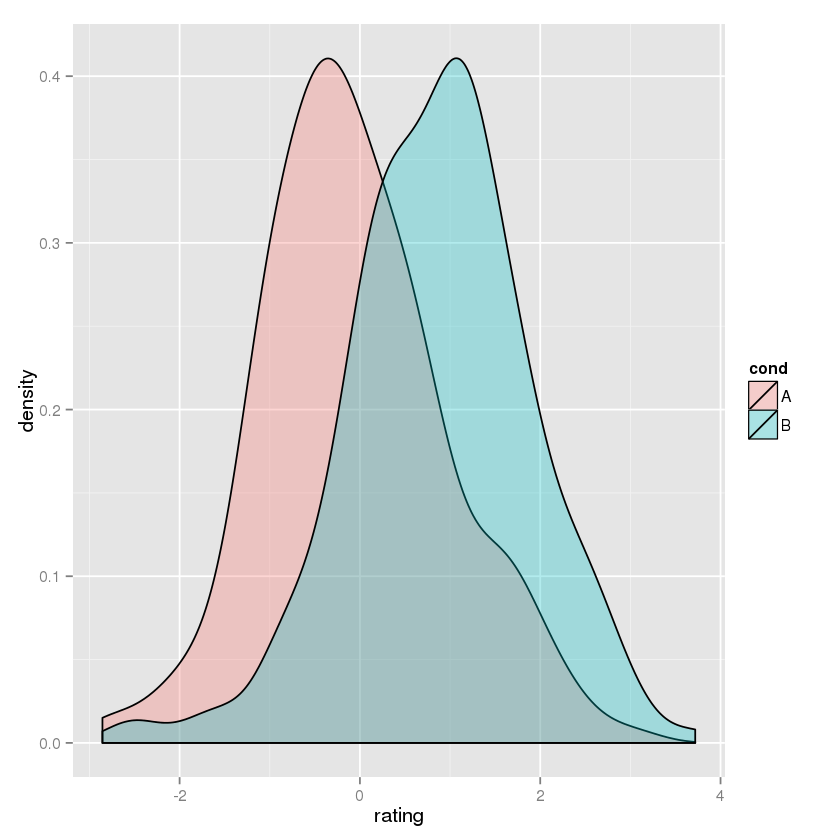

In [11]:
# Density plots with semi-transparent fill
ggplot(dat, aes(x=rating, fill=cond)) + geom_density(alpha=.3)

Add lines for each mean requires first creating a separate data frame with the means:

In [12]:
# Find the mean of each group
library(plyr)
cdat <- ddply(dat, "cond", summarise, rating.mean=mean(rating))
cdat

,cond,rating.mean
1,A,-0.05775928
2,B,0.8732493


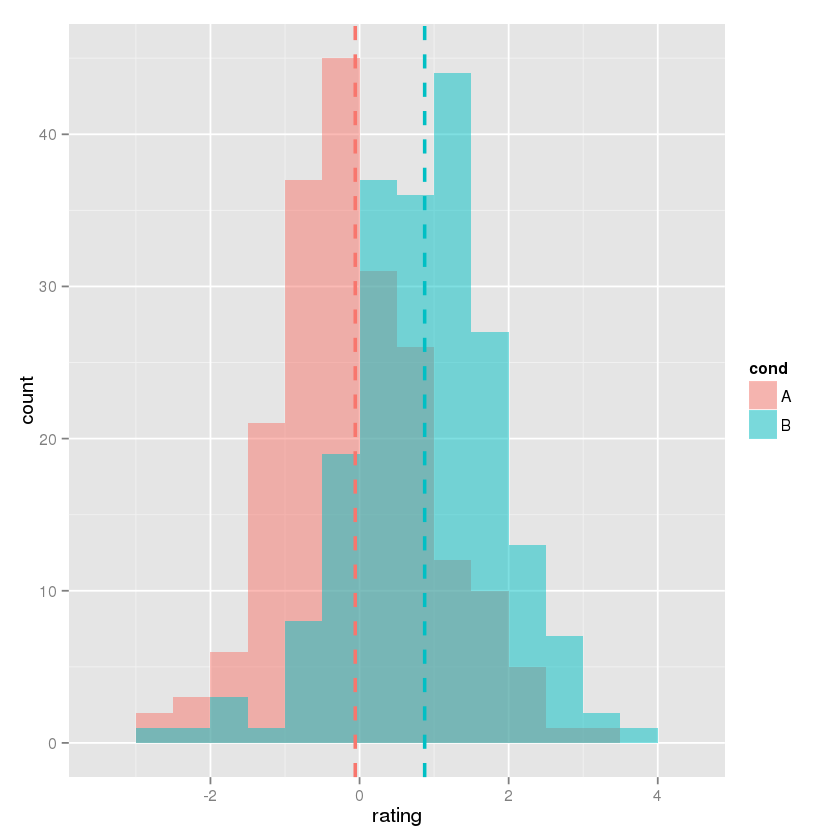

In [13]:
# Overlaid histograms with means
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity") +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)

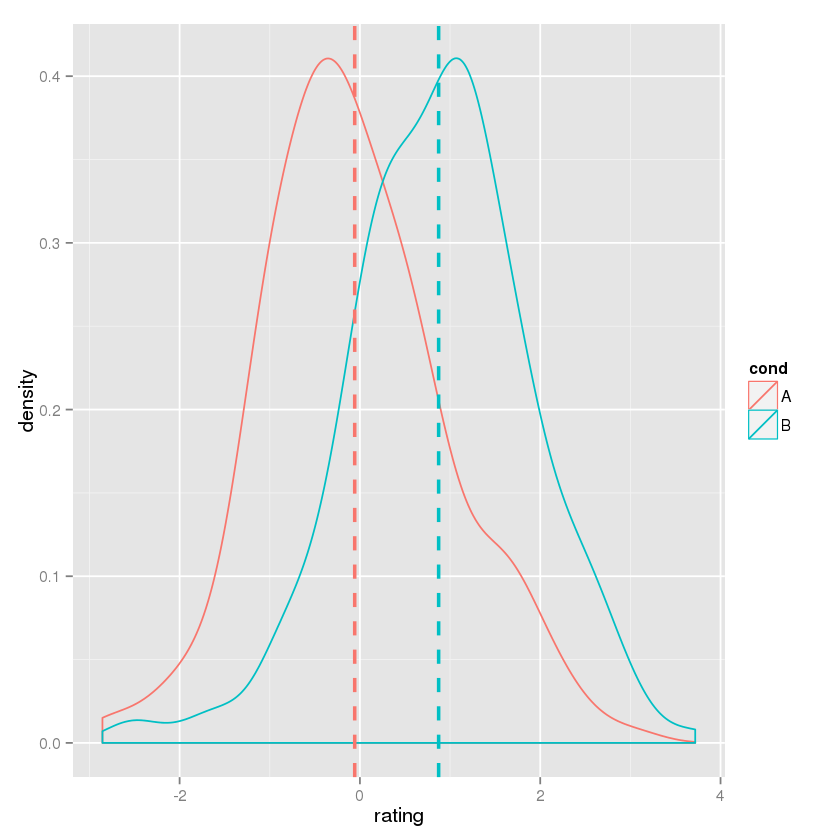

In [14]:
# Density plots with means
ggplot(dat, aes(x=rating, colour=cond)) +
    geom_density() +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)

Using facets:

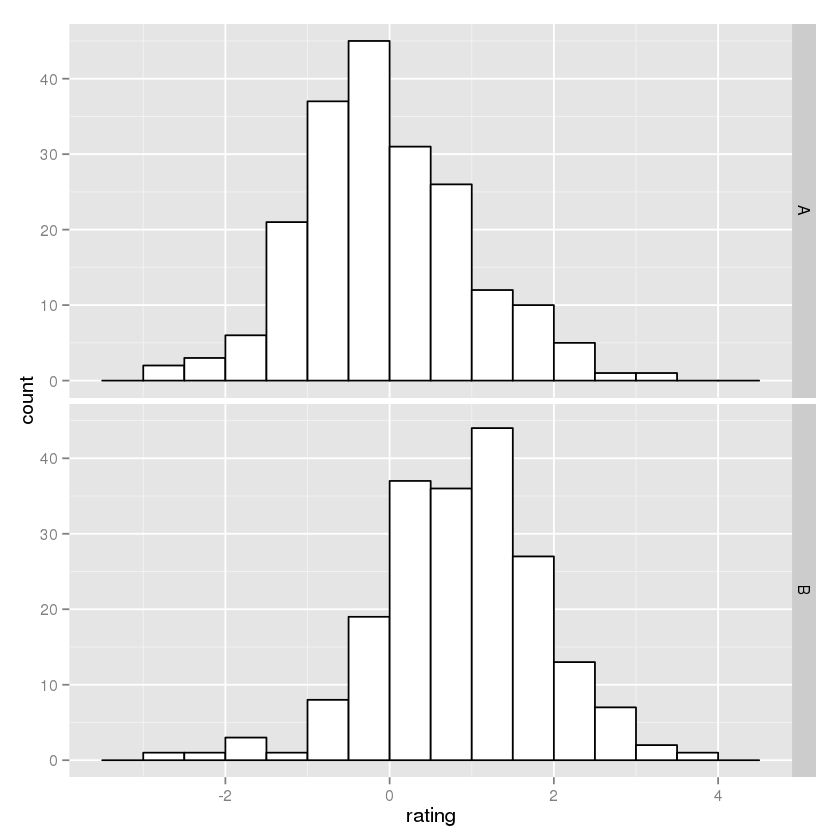

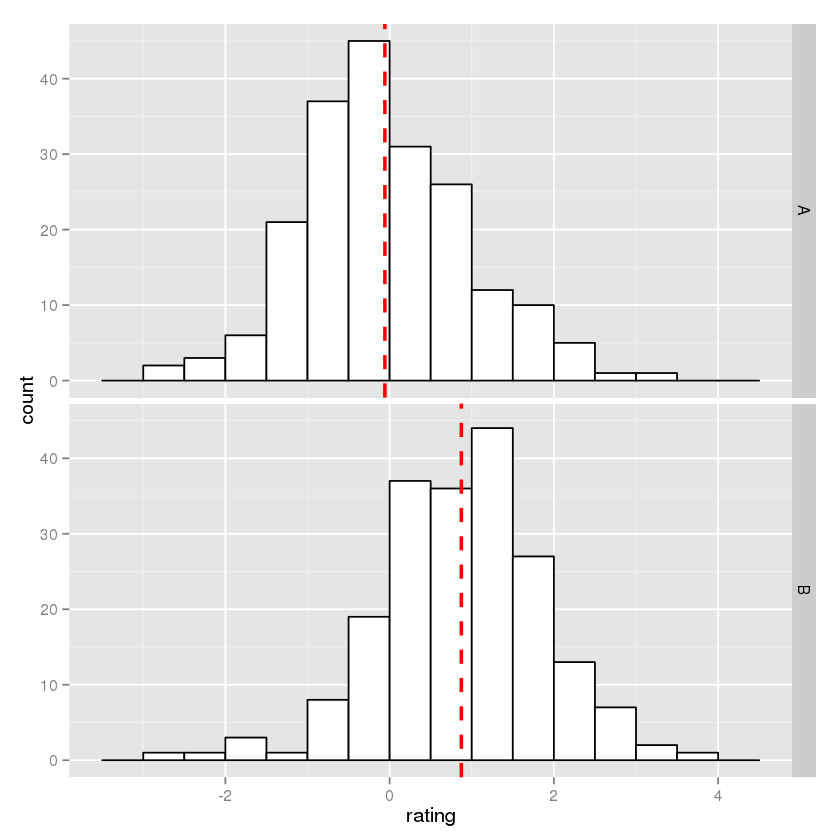

In [15]:
ggplot(dat, aes(x=rating)) + geom_histogram(binwidth=.5, colour="black", fill="white") + 
    facet_grid(cond ~ .)

# With mean lines, using cdat from above
ggplot(dat, aes(x=rating)) + geom_histogram(binwidth=.5, colour="black", fill="white") + 
    facet_grid(cond ~ .) +
    geom_vline(data=cdat, aes(xintercept=rating.mean),
               linetype="dashed", size=1, colour="red")

## Box plots

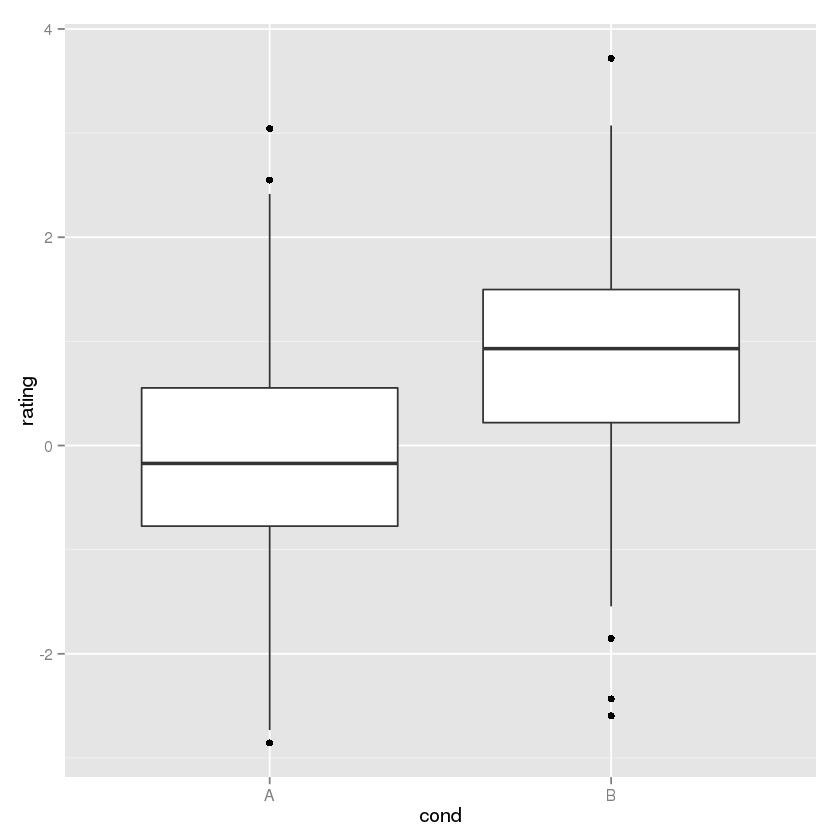

In [16]:
# A basic box plot
ggplot(dat, aes(x=cond, y=rating)) + geom_boxplot()

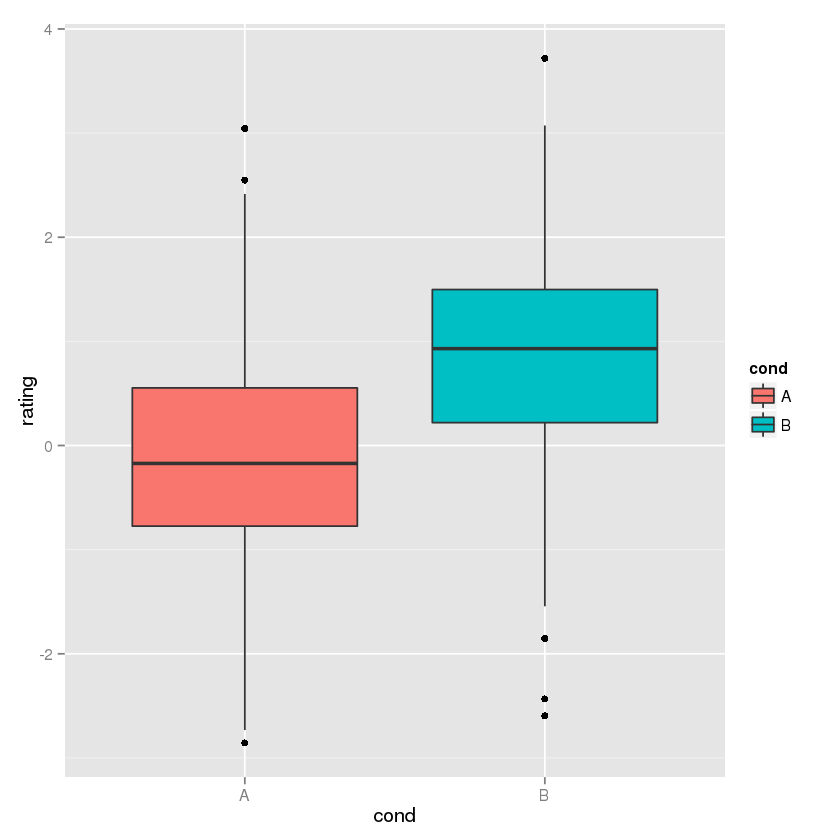

In [17]:
# A basic box with the conditions colored
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot()

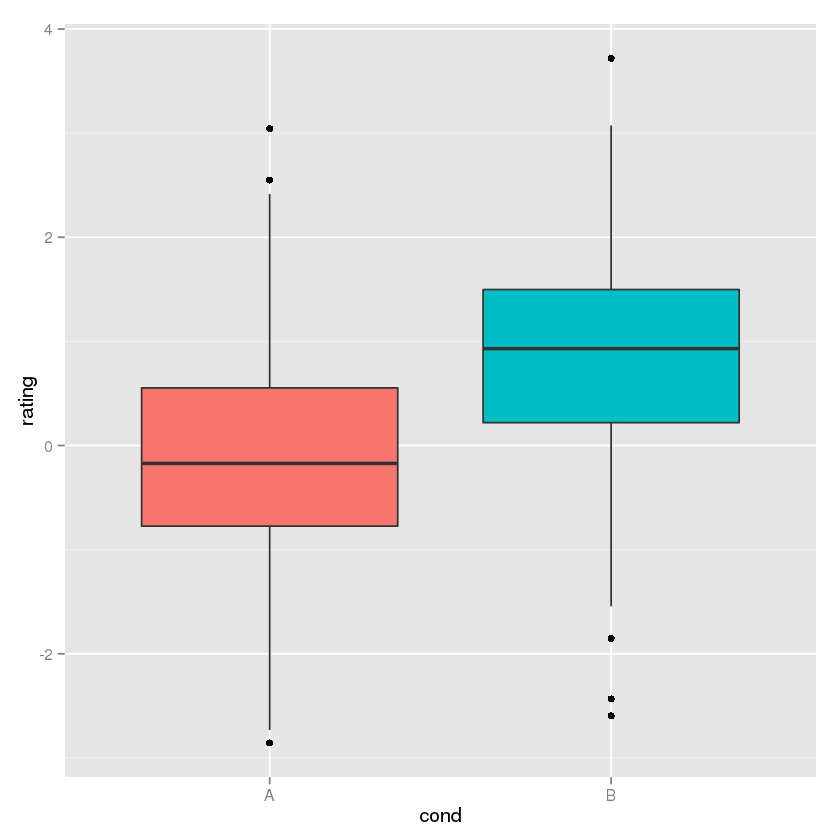

In [18]:
# The above adds a redundant legend. With the legend removed:
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() +
    guides(fill=FALSE)

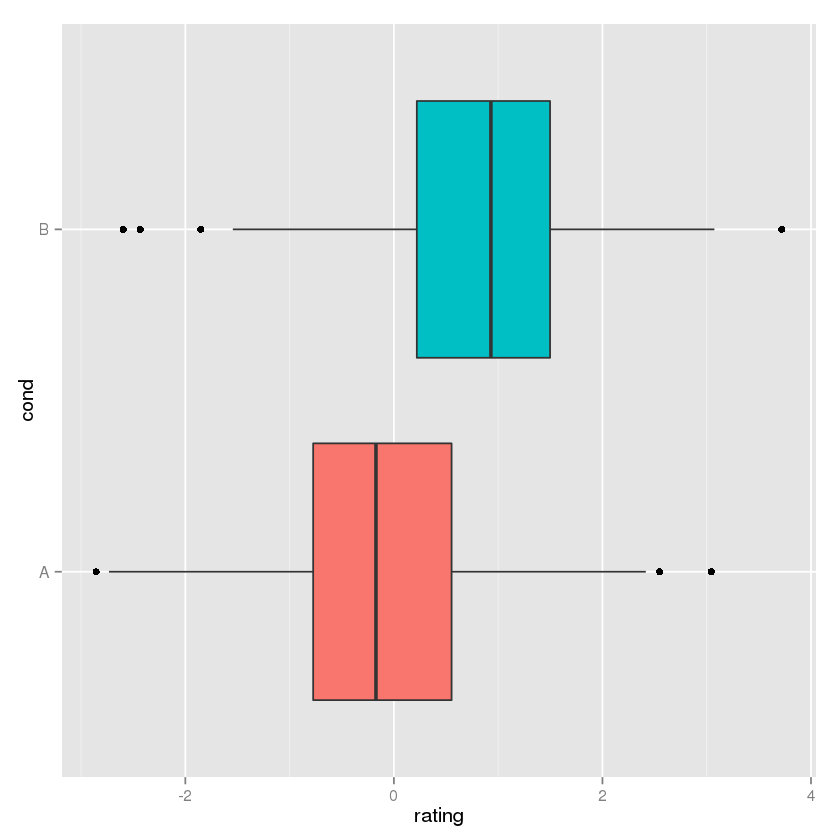

In [19]:
# With flipped axes
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() + 
    guides(fill=FALSE) + coord_flip()

It’s also possible to add the mean by using `stat_summary`.

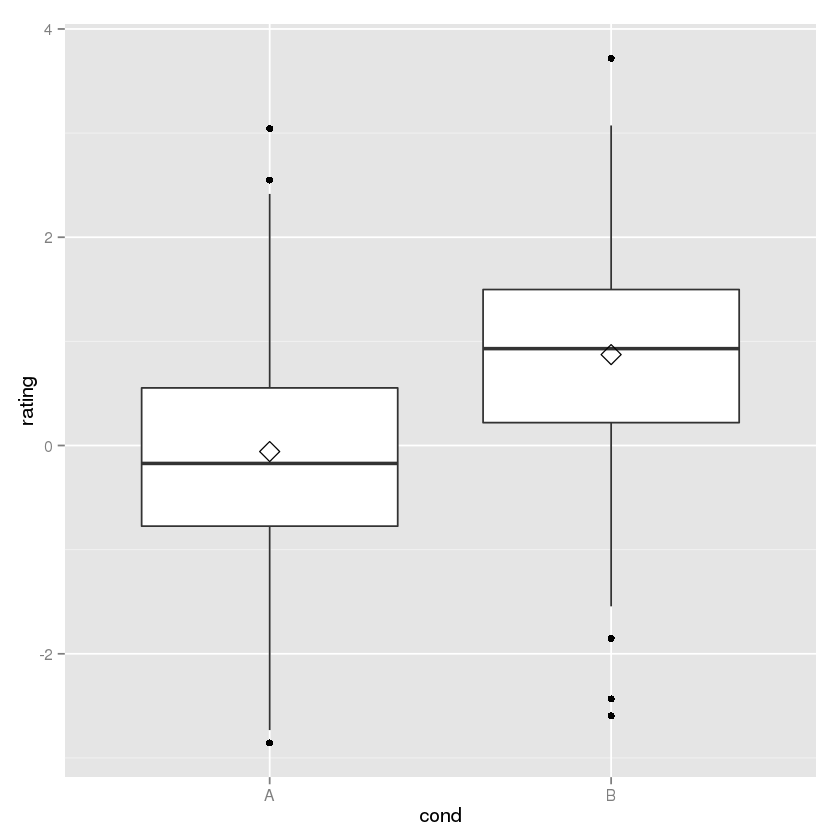

In [20]:
# Add a diamond at the mean, and make it larger
ggplot(dat, aes(x=cond, y=rating)) + geom_boxplot() +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4)